In [ ]:
!pip install neurokit2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 696.5/696.5 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
pkl_file = '/content/drive/MyDrive/WESAD_pkl/S17.pkl'
subject_id = os.path.basename(pkl_file).split('.')[0]
with open(pkl_file, 'rb') as file:
    data = pickle.load(file, encoding='latin1')


In [ ]:
# structure of ECG data
ecg_data = data['signal']['chest']['ECG']
print(ecg_data)
print(ecg_data.shape)



[[1.43179321]
 [1.46195984]
 [1.47161865]
 ...
 [0.16712952]
 [0.17033386]
 [0.17523193]]
(4144000, 1)
dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])


**Binary classsifer random forest all data**

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Load full dataset with HRV features + Label
df = pd.read_csv('/content/drive/MyDrive/WESAD_pkl/ECG/merged_file_all_test.csv')

# Convert to binary stress label (Label==2 → 1, else 0)
df['Label'] = df['Label'].apply(lambda x: 1 if x == 2 else 0)

# Drop columns that should NOT be features
non_feature_cols = ['Label']
X = df.drop(columns=non_feature_cols, errors='ignore')
y = df['Label']

# Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42,stratify=y
)

# Train Random Forest with balanced class weights
clf = RandomForestClassifier(n_estimators=500, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=['No Stress', 'Stress']))

# Save model
joblib.dump(clf, 'stress_rf_binary_all_data_model.pkl')
print("Model saved")


Classification Report on Test Set:
              precision    recall  f1-score   support

   No Stress       0.91      0.96      0.94       224
      Stress       0.83      0.69      0.75        64

    accuracy                           0.90       288
   macro avg       0.87      0.82      0.84       288
weighted avg       0.90      0.90      0.90       288

Model saved


In [15]:
# Built-in feature importance
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

         Feature  Gini Importance
15     HRV_MinNN         0.150020
0     HRV_MeanNN         0.135933
11   HRV_Prc20NN         0.133204
6   HRV_MedianNN         0.085613
12   HRV_Prc80NN         0.079381
16     HRV_MaxNN         0.062635
14     HRV_pNN20         0.036469
10   HRV_SDRMSSD         0.035373
2      HRV_RMSSD         0.031041
4       HRV_CVNN         0.030156
3       HRV_SDSD         0.029484
5       HRV_CVSD         0.029047
13     HRV_pNN50         0.028572
8      HRV_MCVNN         0.027821
1       HRV_SDNN         0.023696
9      HRV_IQRNN         0.022474
17       HRV_HTI         0.020862
7      HRV_MadNN         0.020687
18      HRV_TINN         0.017532


In [8]:
df.head()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,Label
0,704.390244,72.383185,51.700669,52.356854,0.102760,0.073398,684.285714,52.950,0.077380,82.857143,1.400043,651.428571,738.571429,14.634146,56.097561,584.285714,871.428571,5.125000,70.3125,0
1,781.351351,105.003480,78.436031,79.316188,0.134387,0.100385,782.857143,137.670,0.175856,184.285714,1.338715,688.857143,881.714286,29.729730,64.864865,625.714286,990.000000,7.400000,62.5000,0
2,814.285714,77.934777,57.321674,58.181061,0.095709,0.070395,814.285714,95.310,0.117047,119.285714,1.359604,745.714286,882.571429,28.571429,60.000000,638.571429,938.571429,11.666667,179.6875,0
3,875.367965,55.925687,48.130218,48.822015,0.063888,0.054983,882.857143,50.832,0.057577,62.857143,1.161966,834.285714,923.714286,27.272727,63.636364,737.142857,957.142857,8.250000,132.8125,0
4,841.554622,55.473860,54.611689,55.387019,0.065918,0.064894,855.714286,60.363,0.070541,84.285714,1.015787,789.428571,888.000000,29.411765,70.588235,731.428571,954.285714,6.800000,132.8125,0


**3class classification on all data**

Classification Report on Test Set:

              precision    recall  f1-score   support

           1       0.73      0.92      0.82       116
           2       0.80      0.77      0.78        64
           3       0.29      0.06      0.10        34

    accuracy                           0.74       214
   macro avg       0.61      0.58      0.57       214
weighted avg       0.68      0.74      0.69       214



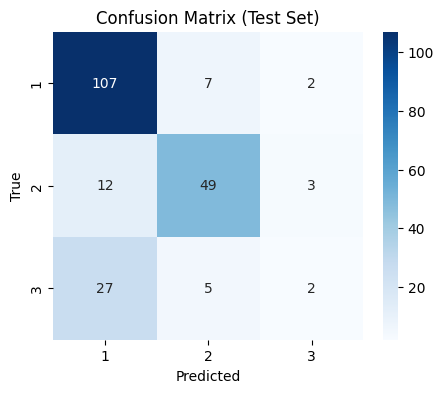

Model saved


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/WESAD_pkl/ECG/merged_file_all_test.csv')

# drop label 4 becasue 3 class classification
df = df[df['Label'] != 4]

# Separate features and label
X = df.drop(columns=['Label'])
y = df['Label']

# training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest
clf = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")

# Train on training data
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluation report
print("Classification Report on Test Set:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()
joblib.dump(clf, 'stress_rf_3_all_data_model.pkl')
print("Model saved")


**Binary classifiction using 12 subject data for training and 3 subject data as testing(Leave one group out approach)**

In [ ]:
import pandas as pd
import joblib
import neurokit2 as nk

# Loading model
model = joblib.load('/stress_rf_model.pkl')

#Loading 30s test ECG window
window_path = '/content/drive/MyDrive/WESAD_pkl/ECG/ECG_RAW/ECG_binary_Class/s15_30s/1/S15_window_88.csv'
df = pd.read_csv(window_path)

# ECG cleaning and feature extraction using neurokit
ecg_signal = df['ECG'].values
signals, info = nk.ecg_process(ecg_signal, sampling_rate=700)
hrv_features = nk.hrv_time(signals['ECG_R_Peaks'], sampling_rate=700, show=False)


# drop label
X = hrv_features.drop(columns=['Label'], errors='ignore')
X = X.dropna(axis=1, how='all')

prediction = model.predict(X)[0]
true_label = df['Label'].mode()[0]

# Output
print(f"Model Prediction: {prediction}")
print(f"Ground Truth Label: {true_label}")
print("Correct!" if prediction == true_label else "Incorrect.")


Model Prediction: 1
Ground Truth Label: 1
Correct!


**3class classification using 12 subject data and 3 testing data**

In [ ]:
import pandas as pd
import joblib
import neurokit2 as nk

# Loading model
model = joblib.load('/rf_model_3class_full_data.pkl')

#Loading 30s test ECG window
window_path = '/content/drive/MyDrive/WESAD_pkl/ECG/ECG_RAW/ECG_binary_Class/s15_30s/1/S15_window_88.csv'
df = pd.read_csv(window_path)

# ECG cleaning and feature extraction using neurokit
ecg_signal = df['ECG'].values
signals, info = nk.ecg_process(ecg_signal, sampling_rate=700)
hrv_features = nk.hrv_time(signals['ECG_R_Peaks'], sampling_rate=700, show=False)


# drop label
X = hrv_features.drop(columns=['Label'], errors='ignore')
X = X.dropna(axis=1, how='all')

prediction = model.predict(X)[0]
true_label = df['Label'].mode()[0]

# Output
print(f"Model Prediction: {prediction}")
print(f"Ground Truth Label: {true_label}")
print("Correct!" if prediction == true_label else "Incorrect.")


Model Prediction: 2
Ground Truth Label: 1
Incorrect.
